In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('titanic.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

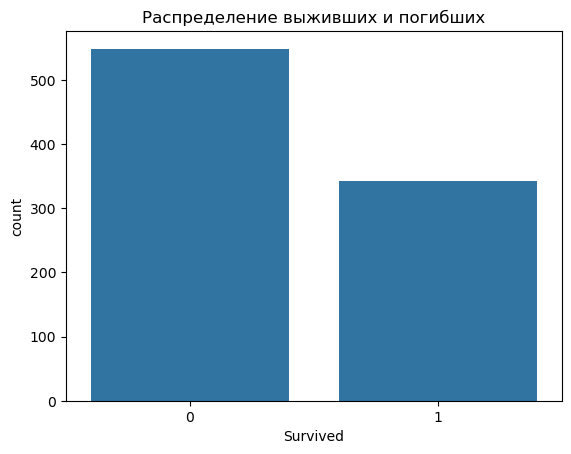

In [6]:
sns.countplot(x='Survived', data=df)
plt.title('Распределение выживших и погибших')
plt.show()

In [7]:
#Мы можем наблюдать, что погибших больше, чем выжевших. Посмотрим другие признаки

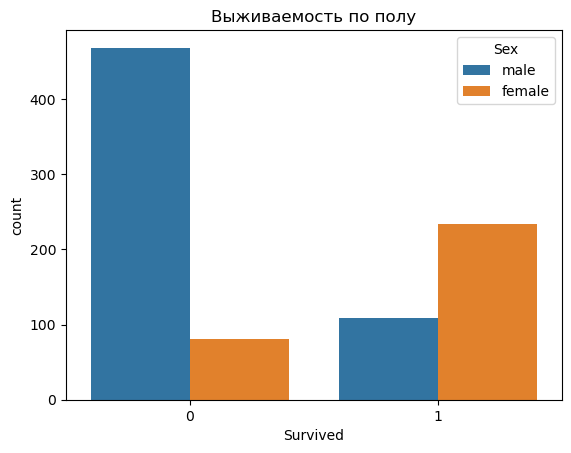

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Выживаемость по полу')
plt.show()

In [9]:
#Женщины имели гораздо больше шансов на выживание, что подчеркивает важность учета этого признака в модели

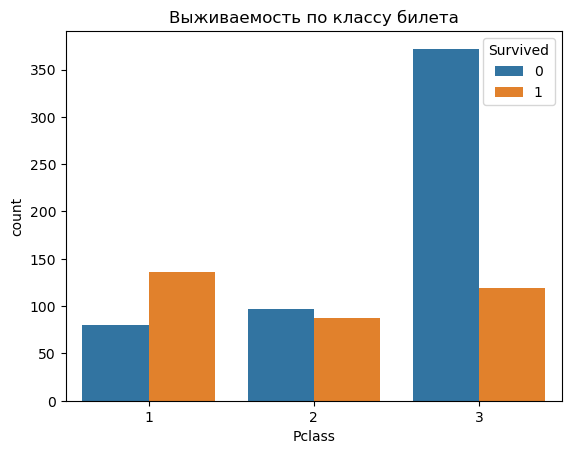

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Выживаемость по классу билета')
plt.show()

In [11]:
#Пассажиры первого класса имели значительно больше шансов на выживание, чем пассажиры третьего класса.

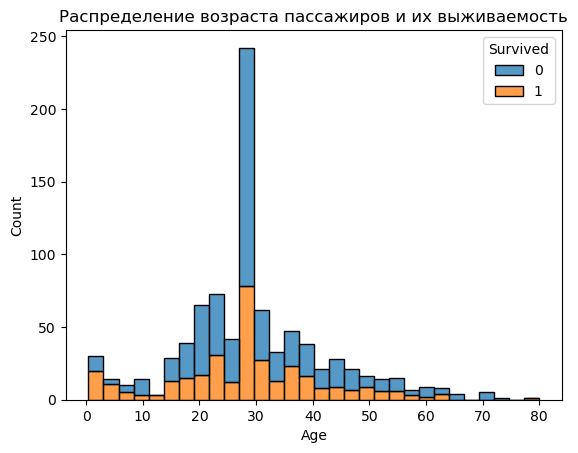

In [12]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Распределение возраста пассажиров и их выживаемость')
plt.show()

In [13]:
#Более молодые пассажиры имели более высокие шансы на выживание, особенно дети.

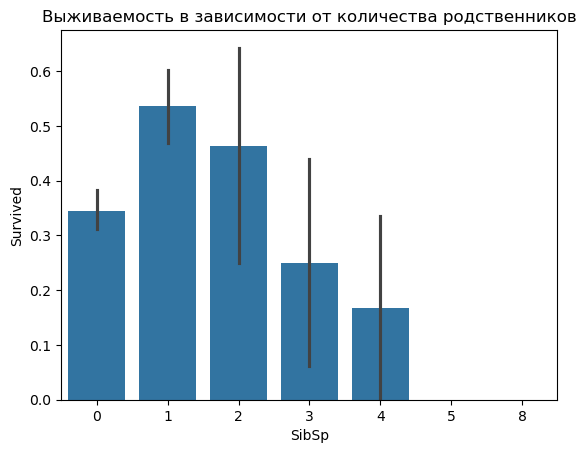

In [14]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Выживаемость в зависимости от количества родственников')
plt.show()

In [15]:
#Пассажиры, у которых было немного родственников на борту (1-2), имели больше шансов на выживание.

In [16]:
# 2. Признак "одинокий пассажир" (IsAlone)
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1

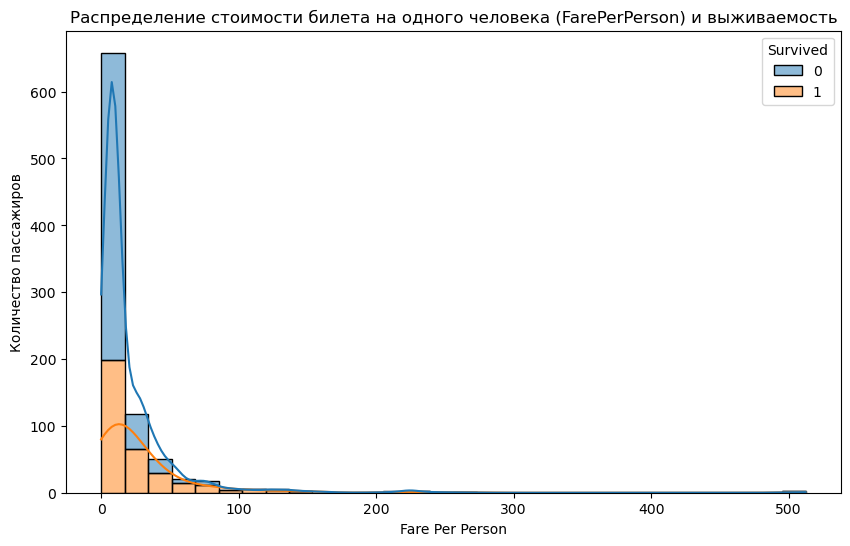

In [17]:
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='FarePerPerson', hue='Survived', multiple='stack', kde=True, bins=30)
plt.title('Распределение стоимости билета на одного человека (FarePerPerson) и выживаемость')
plt.xlabel('Fare Per Person')
plt.ylabel('Количество пассажиров')
plt.show()

In [18]:
#Чем выше стоимость билета на одного пассажира, тем больше шансы на выживание. 
#Это указывает на связь между социально-экономическим статусом и возможностью спастись, 
#так как более обеспеченные пассажиры, вероятно, имели доступ к лучшим условиям и спасательным средствам.

<Figure size 1000x800 with 0 Axes>

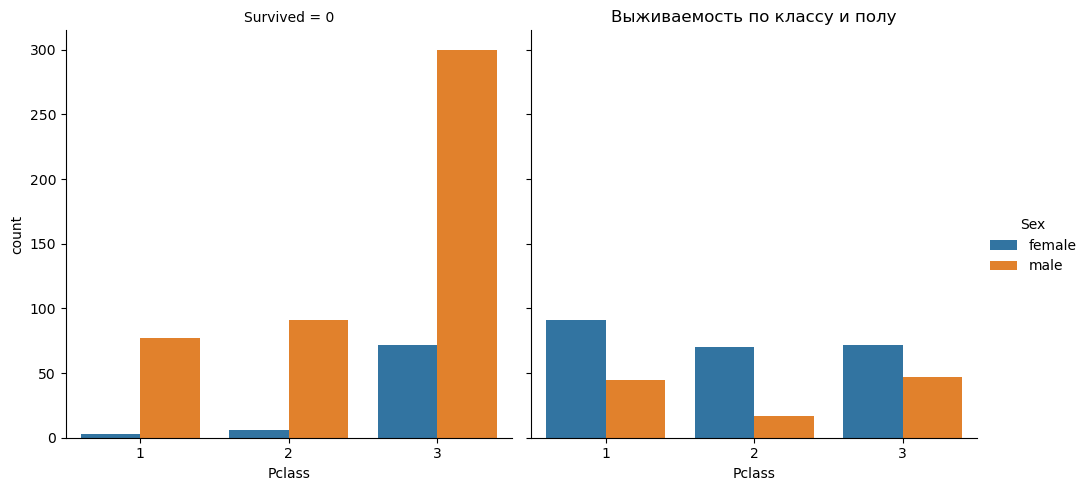

In [19]:
plt.figure(figsize=(10, 8))
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.title('Выживаемость по классу и полу')
plt.show()

In [20]:
# класс билета и пол играли важную роль в выживаемости на Титанике. Высокий класс и женский пол значительно увеличивали шансы на выживание.

In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=[0, 1, 2, 3])

In [22]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
df['SurvivalRateByClass'] = df['Pclass'].map(survival_rate_by_class)

In [23]:
print(df[['IsAlone', 'AgeGroup', 'SurvivalRateByClass','FarePerPerson']].head())

   IsAlone AgeGroup  SurvivalRateByClass  FarePerPerson
0        0        1             0.242363        3.62500
1        0        2             0.629630       35.64165
2        1        1             0.242363        7.92500
3        0        2             0.629630       26.55000
4        1        2             0.242363        8.05000


In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  891 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                204 non-null    object  
 11  Embarked             891 non-null    object  
 12  FamilySize           891 non-null    int64   
 13  IsAlone              891 non-null    int64   
 14  FarePerPerson        891 non-null    float64 
 15  AgeGroup             89

In [26]:
catregorical_cols= df.select_dtypes(include=['object']).columns
label_encoders ={}

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in catregorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
catregorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FarePerPerson,AgeGroup,SurvivalRateByClass
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1,0,3.62500,1,0.242363
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1,0,35.64165,2,0.629630
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0,1,7.92500,1,0.242363
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1,0,26.55000,2,0.629630
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0,1,8.05000,2,0.242363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0,1,13.00000,1,0.472826
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0,1,30.00000,1,0.629630
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2,3,0,5.86250,1,0.242363
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,1,30.00000,1,0.629630


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    int32   
 4   Sex                  891 non-null    int32   
 5   Age                  891 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    int32   
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    int32   
 11  Embarked             891 non-null    int32   
 12  FamilySize           891 non-null    int64   
 13  IsAlone              891 non-null    int64   
 14  FarePerPerson        891 non-null    float64 
 15  AgeGroup             89

In [31]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone', 'FamilySize', 'SurvivalRateByClass','Sex','AgeGroup','FarePerPerson']
X = df[features]
y = df['Survived']

In [32]:
X

,Pclass,Age,SibSp,Parch,Fare,IsAlone,FamilySize,SurvivalRateByClass,Sex,AgeGroup,FarePerPerson
0,3,22.0,1,0,7.2500,0,1,0.242363,1,1,3.62500
1,1,38.0,1,0,71.2833,0,1,0.629630,0,2,35.64165
2,3,26.0,0,0,7.9250,1,0,0.242363,0,1,7.92500
3,1,35.0,1,0,53.1000,0,1,0.629630,0,2,26.55000
4,3,35.0,0,0,8.0500,1,0,0.242363,1,2,8.05000
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0.472826,1,1,13.00000
887,1,19.0,0,0,30.0000,1,0,0.629630,0,1,30.00000
888,3,28.0,1,2,23.4500,0,3,0.242363,0,1,5.86250
889,1,26.0,0,0,30.0000,1,0,0.629630,1,1,30.00000


In [33]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.078)))
model.add(Dropout(0.059))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4386 - loss: 2.1769 - val_accuracy: 0.6993 - val_loss: 1.8857
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 1.8271 - val_accuracy: 0.7413 - val_loss: 1.6198
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 1.5783 - val_accuracy: 0.7762 - val_loss: 1.3976
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 1.3768 - val_accuracy: 0.8182 - val_loss: 1.2090
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 1.1853 - val_accuracy: 0.8112 - val_loss: 1.0545
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 1.0420 - val_accuracy: 0.8182 - val_loss: 0.9360
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.9243 - val_accuracy: 0.8252 - val_loss: 0.8370
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.8274 - val_accuracy: 0.8252 - val_loss

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.6588 - val_accuracy: 0.8182 - val_loss: 0.5965
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.6301 - val_accuracy: 0.8182 - val_loss: 0.5633
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.5416 - val_accuracy: 0.8182 - val_loss: 0.5324
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8231 - loss: 0.5441 - val_accuracy: 0.8252 - val_loss: 0.5120
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.4869 - val_accuracy: 0.8252 - val_loss: 0.4917
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.4966 - val_accuracy: 0.8182 - val_loss: 0.4799
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.5213 - val_accuracy: 0.8182 - val_loss: 0.4672
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.4807 - val_accuracy: 0.8182 - val_loss:

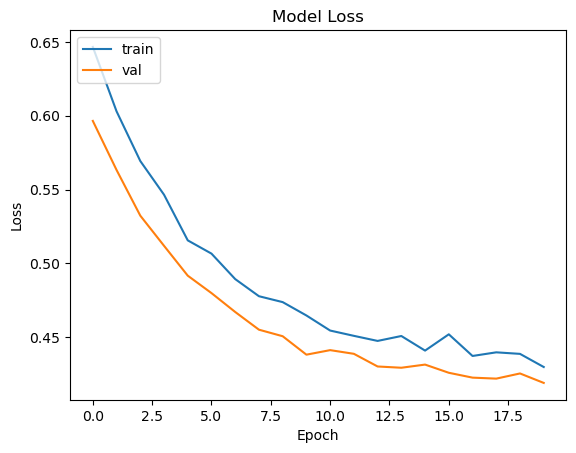

In [35]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
